# Intervalle de confiance et distribution de student

Le but de ce cahier est de montrer le lien entre intervalle de confiance et facteur multiplicatif de la loi loi de Student pour respecter les intrvalles de confiance souhaités. Il s'agit d'une mise en évidence numérique et aucunement d'une démonstration.

On prend ici comme distribution de départ une distribution gaussienne, centrée en 0 et d'écart-type 1.

## Notion d'intervalle de confiance

Le sens d'un intervalle de confiance est d'avoir une probabilité $X$ d'avoir la mesure vraie comprise dans l'intervalle donné. Pour montrer cela, on va supposer que la valeur prise est la moyenne de $n=1000$ mesures et on va répéter l'expérience $p=100$ fois.

In [1]:
import numpy as np
from scipy.stats import norm
n=1000
p = 100
#tirage des mesures effectués sur la moyenne de n tirage et répété 100 fois
tirages = norm.rvs(loc=0,scale=1., size=(n,p))
moy = np.average(tirages, axis = 0 ) #moyennes
ecarttypes = np.std(tirages,ddof=1,axis = 0 ) #écart-types
sigma_moyenne = ecarttypes/np.sqrt(n) #écart-type sur la moyenne

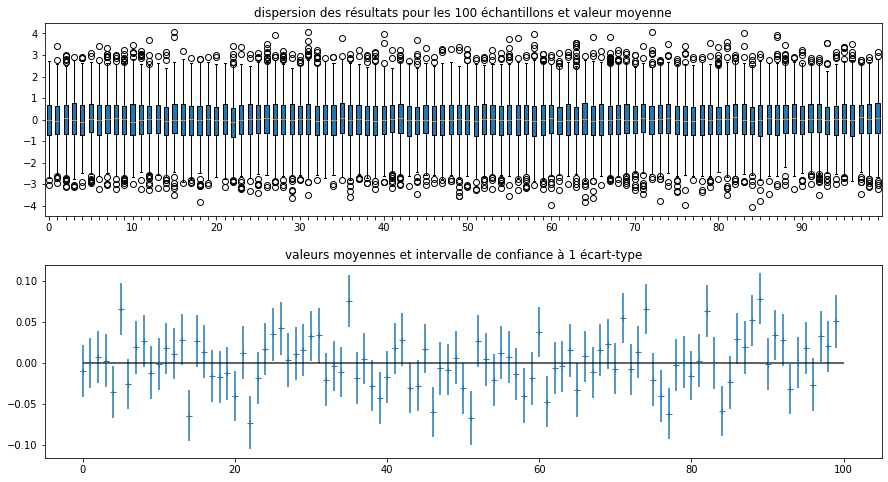

Il y a 71.0 % des valeurs mesurées qui incluent la valeur attendue.


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(2, 1,hspace=0.25)
ax1=fig.add_subplot(gs[0,0])
indices = np.arange(p)
#pour n'avoir un label que tous les multiples de 10
labelsIndix = [str(a) if a%(p//10)==0 else '' for a in indices]
#Tracé des histogrammes
dump = ax1.boxplot(tirages,labels=labelsIndix,patch_artist=True)
#calcul de l'écart-type théorique sans prendre en compte la distribution de student sigma_moy = sigma_z/sqrt(n)

ax1.set_title('dispersion des résultats pour les {} échantillons et valeur moyenne'.format(p))

ax2 = fig.add_subplot(gs[1,0])

#tracé des intervalles à un écart-type
ax2.errorbar(indices,moy,yerr=sigma_moyenne,marker='+',ls='')
#tracé de la valeur attendue
ax2.hlines(0.,0,p,facecolor='#beaed4',alpha=0.8)

ax2.set_title('valeurs moyennes et intervalle de confiance à 1 écart-type')
#On va compter les valeurs moyennes comprises dans l'intervalle de confiance à 1 écart type
moy_in_range = ((0 < moy+sigma_moyenne ) & (0 > moy-sigma_moyenne)).sum(axis=0)

plt.show()
print('Il y a {} % des valeurs mesurées qui incluent la valeur attendue.'.format(moy_in_range/p*100))

Le nombre de valeurs moyennes mesurées dans l'intervalle de confiance à 1 écart-type est normalement de l'ordre de ... 68% (en pratique, sur quatre essais, j'ai eu 68, 62, 67, 69). À partir de nos mesures, on a donc bien environ 68% de chances de donner la valeur attendue. C'est ce qui est attendu pour la distribution gaussienne (68,27% de chances que la valeur vraie soit dans l'intervalle donné).

# Nécessité de prendre en compte la taille de l'échantillonnage

Nous allons recommencer en prenant cette fois-ci une moyenne sur seulement $n=2$ tirages et on va cette fois-ci répéter $p=1000$ fois l'opération. Puis on va répéter le tout sur $sampling$ échantillons pour limiter l'impact des effets aléatoires.

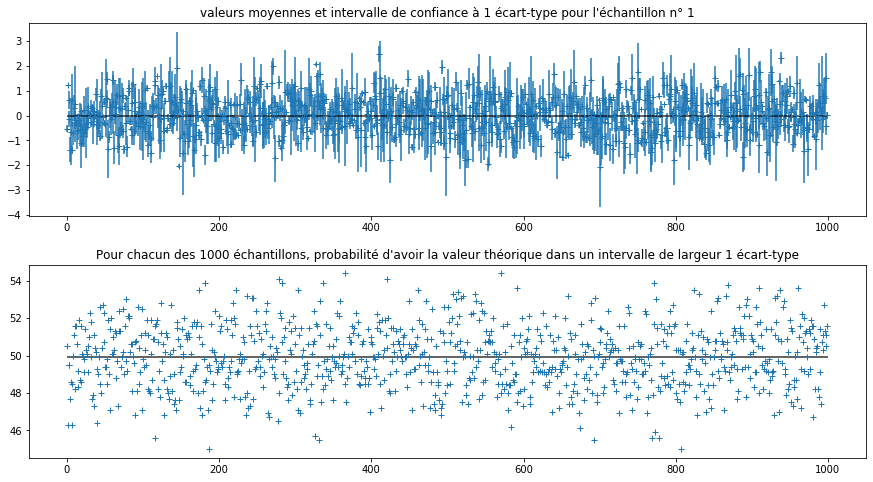

Sur 1000 répétitions de 1000 moyennes faites à partir de 2 mesures, on a 49.9328 % de chance d'avoir la valeur théorique inclue dans l'intervalle donné.


In [3]:
n=2
p = 1000
sampling = 1000
#tirage des mesures effectués sur la moyenne de n tirage et répété p fois, le tout en sampling échantillons
tirages = norm.rvs(loc=0,scale=1., size=(n,p,sampling))
moy = np.average(tirages, axis = 0 ) #moyennes 
ecarttypes = np.std(tirages,ddof=1,axis = 0 ) #écart-types
sigma_moyenne = ecarttypes/np.sqrt(n) #écart-types sur la moyenne

indices = np.arange(p)#indices sur le nombre de tirage au sein d'un échantillon
indicesSampling = np.arange(sampling) #indices les échantillons

fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(2, 1,hspace=0.25)
ax2 = fig.add_subplot(gs[0,0])

#tracé des valeurs moyennes avec l'intervalle correspondant à un écart-type
ax2.errorbar(indices,moy[:,1],yerr=sigma_moyenne[:,1],marker='+',ls='')
#tracé de la valeur attendue
ax2.hlines(0.,0,p,facecolor='#beaed4',alpha=0.8)
ax2.set_title('valeurs moyennes et intervalle de confiance à 1 écart-type pour l\'échantillon n° 1')

#On va compter le pourcentage de chance d'avoir la valeur théorique comprises à moins d'un écart type de la moyenne
moy_in_range = ((0 < moy+sigma_moyenne ) & (0 > moy-sigma_moyenne)).sum(axis=0)/p*100

ax1 = fig.add_subplot(gs[1,0])
ax1.plot(indicesSampling,moy_in_range,marker='+',ls='')
ax1.hlines(np.average(moy_in_range),0,p,facecolor='#beaed4',alpha=0.8)
ax1.set_title('Pour chacun des {} échantillons, probabilité d\'avoir la valeur théorique dans un intervalle de largeur 1 écart-type'.format(sampling))
plt.show()
print('Sur {} répétitions de {} moyennes faites à partir de {} mesures, on a {} % de chance d\'avoir la valeur théorique inclue dans l\'intervalle donné.'.format(sampling,p,n, np.average(moy_in_range)))

On peut voir qu'en réduisant significativement le nombre de mesures faites (valeur de $n$), la probabilité d'avoir la valeur vraie comprise à moins d'un écart-type n'est plus celle attendue pour une gaussienne (68,27%) mais bien plus faible (environ 50%). L'écart est dû au fait d'avoir pris un nombre de mesures $n$ fini pour faire la moyenne. Plus l'échantillonnage est élevé, moins cet effet est important. C'est la distribution de Student qui va permettre de corriger le biais lié au fait d'avoir un échantillonnage fini.

## Correction avec la distribution de Student

On va maintenant appliquer un facteur correctif pour avoir une incertitude élargie $U=k_\text{student} \sigma_\text{moyenne}$ de manière à se ramener aux intervalles de confiance correspondant à ceux d'une gaussienne.

Le code suivant est identique à celui ci-dessus, la seule différence étant au fait de prendre maintenant $\sigma_\text{corrigé} =\sigma_\text{moyenne} \times t(68,27\%,n-1)$. Le premier chiffre est l'intervalle de confiance souhaité, le deuxième est le nombre de degré de liberté qui est ici égal à $n-1$ (le « $-1$ » étant lié au fait d'avoir déjà défini la moyenne à partir de nos $n$ valeurs).

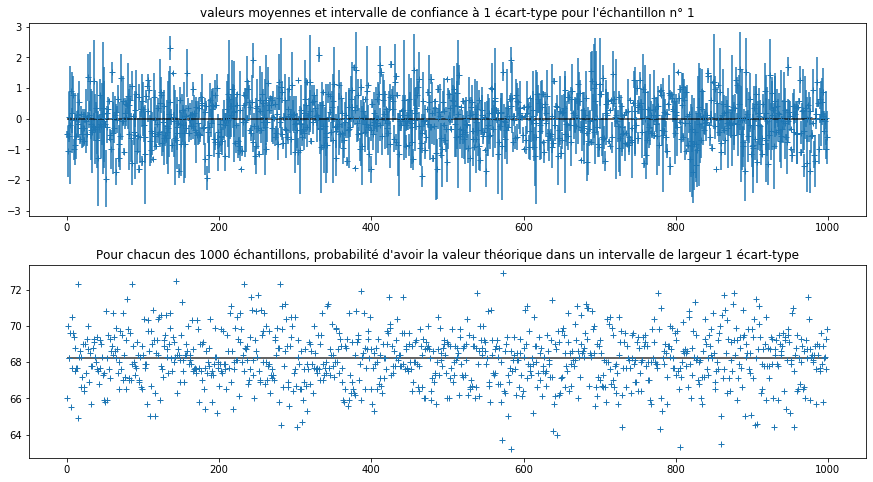

Sur 1000 répétitions de 1000 moyennes faites à partir de 2 mesures, on a 68.20739999999999 % de chance d'avoir la valeur théorique inclue dans l'intervalle donné


In [4]:
from scipy.stats import t

n=2
p = 1000
sampling = 1000
#tirage des mesures effectués sur la moyenne de n tirage et répété p fois, le tout en sampling échantillons
tirages = norm.rvs(loc=0,scale=1., size=(n,p,sampling))
moy = np.average(tirages, axis = 0 ) #moyennes 
ecarttypes = np.std(tirages,ddof=1,axis = 0 ) #écart-types
sigma_moyenne = ecarttypes/np.sqrt(n) #écart-types sur la moyenne
#############
##correction par le facteur de student
#############
sigma_corrige = sigma_moyenne * t.interval(0.6827,n-1)[1]
#############



indices = np.arange(p)#indices sur le nombre de tirage au sein d'un échantillon
indicesSampling = np.arange(sampling) #indices les échantillons

fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(2, 1,hspace=0.25)
ax2 = fig.add_subplot(gs[0,0])

#tracé des valeurs moyennes avec l'intervalle correspondant à un écart-type
ax2.errorbar(indices,moy[:,1],yerr=sigma_moyenne[:,1],marker='+',ls='')
#tracé de la valeur attendue
ax2.hlines(0.,0,p,facecolor='#beaed4',alpha=0.8)
ax2.set_title('valeurs moyennes et intervalle de confiance à 1 écart-type pour l\'échantillon n° 1')

#On va compter le pourcentage de chance d'avoir la valeur théorique comprises à moins d'un écart type de la moyenne
#######
## correction de l'intervalle incluant la valeur, maintenant, on regarde à +- sigma_corrige au lieu de sigma_moyenne
#######
moy_in_range = ((0 < moy+sigma_corrige ) & (0 > moy-sigma_corrige)).sum(axis=0)/p*100

ax1 = fig.add_subplot(gs[1,0])
ax1.plot(indicesSampling,moy_in_range,marker='+',ls='')
ax1.hlines(np.average(moy_in_range),0,p,facecolor='#beaed4',alpha=0.8)
ax1.set_title('Pour chacun des {} échantillons, probabilité d\'avoir la valeur théorique dans un intervalle de largeur 1 écart-type'.format(sampling))
plt.show()
print('Sur {} répétitions de {} moyennes faites à partir de {} mesures, on a {} % de chance d\'avoir la valeur théorique inclue dans l\'intervalle donné'.format(sampling,p,n, np.average(moy_in_range)))
#print('Il y a {} % de moyennes comprises dans l\'intervalle de confiance de la distribution'.format(float(moy_in_range[1]/p)*100))


Avec la correction par le facteur de student, quelle que soit la valeur de $n$ l'intervalle de confiance est maintenant proche de la valeur attendue ! **Changez la valeur de $n$ dans le code ci-dessus pour vous en convaincre et relancer le code plusieurs fois pour voir que ce n'est pas lié au hasard.**

On peut maintenant tracer la valeur corrective en fonction de $n$ pour voir pourquoi notre première approche marchait bien dans le cas $n=1000$ mais pas pour la cas $n=2$.

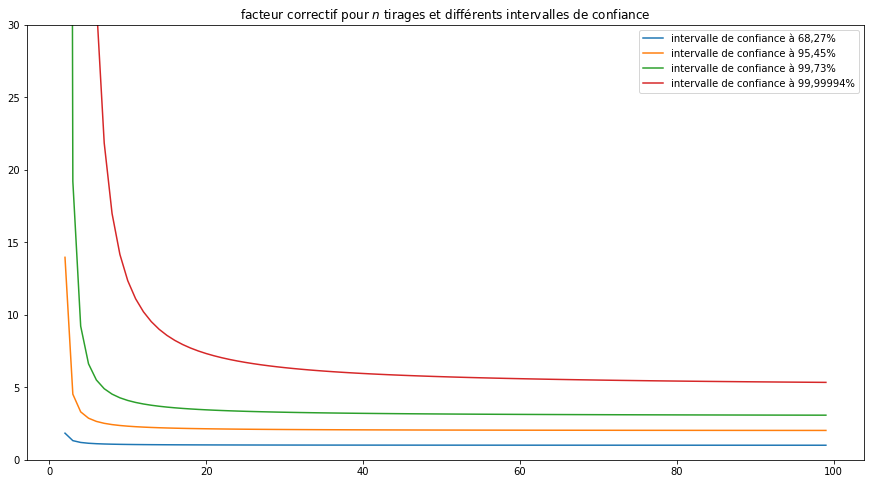

In [5]:
maxn = 100
ns = np.arange(1,maxn)
ts1 = t.interval(0.6827,ns-1)[1]
ts2 = t.interval(0.9545,ns-1)[1]
ts3 = t.interval(0.9973,ns-1)[1]
ts5 = t.interval(0.9999994,ns-1)[1]

fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(1, 1,hspace=0.25)
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(ns,ts1,label='intervalle de confiance à 68,27%')
ax1.plot(ns,ts2,label='intervalle de confiance à 95,45%')
ax1.plot(ns,ts3,label='intervalle de confiance à 99,73%')
ax1.plot(ns,ts5,label='intervalle de confiance à 99,99994%')
ax1.set_ylim(0,30)
ax1.set_title('facteur correctif pour $n$ tirages et différents intervalles de confiance' )
plt.legend()
plt.show()

Les intervalles de confiances choisis sont ceux correspondant à 1,2,3 et 5 $\sigma$ pour une distribussion gaussienne. Les facteurs de Student tendent donc respectivement vers 1, 2, 3 ou 5 quand $n \to \infty$. Pour 1000 mesures, le facteur correctif de Student est déjà presque égal à 1 (il vaut 1.001), c'est ce qui justifie le fait que pour une grande valeur de $n$, la correction de student liée à l'échantillonnage est faible. 


## Quelques valeurs du facteur de Student

Les valeurs correctives liées à la loi de Student pour différents intervalles de confiance en fonction du nombre de mesures $n$ sur lesquelles sont mesurées la moyenne sont données dans le tableau ci-dessous. En général, on préfère donner ce facteur en fonction du nombre de degrés de liberté qui est ici égal à $n-1$.

In [6]:
ns = np.array([2,3,5,10,20,50,100,500,1000,1000000])
ts1 = t.interval(0.6827,ns-1)[1]
ts2 = t.interval(0.9545,ns-1)[1]
ts3 = t.interval(0.9973,ns-1)[1]
ts5 = t.interval(0.9999994,ns-1)[1]
table = np.stack((ns,ts1,ts2,ts3,ts5))
print('n\t\t 68,27% \t 95.45% \t 99.73%  \t 99,99994%')
for (i,n) in enumerate(ns):
    print('{:.0f} \t\t {:.3f}\t\t {:.3f}\t\t {:.3f}\t\t {:.3f}'.format(table[0,i],table[1,i],table[2,i],table[3,i],table[4,i]))

n		 68,27% 	 95.45% 	 99.73%  	 99,99994%
2 		 1.837		 13.968		 235.784		 1061032.954
3 		 1.321		 4.527		 19.206		 1290.994
5 		 1.142		 2.869		 6.620		 56.204
10 		 1.059		 2.320		 4.094		 12.356
20 		 1.027		 2.140		 3.447		 7.329
50 		 1.010		 2.052		 3.160		 5.734
100 		 1.005		 2.026		 3.078		 5.337
500 		 1.001		 2.005		 3.015		 5.057
1000 		 1.001		 2.003		 3.008		 5.024
1000000 		 1.000		 2.000		 3.000		 4.991
